# Анализ данных сервиса аренды самокатов GoFast.

**Цель исследования**: изучить данные и проверить гипотезы, которые помогут бизнесу вырасти.

Мы имеем данные о пользователях, их поездках и подписках.

# План работы:

**Шаг 1. Загрузка данных**

1. Прочитать файлы.
2. Вывести первые строки (head).
3. Изучить общую инофрмацию о датасетах (info).

**Шаг 2. Предобработка данных**

4. Привести столбец date к типу даты pandas.
5. Создать новый столбец month с номером месяца на основе столбца date.
6. Проверить наличие пропущенных значений.
7. Обработать пропущенные значения, если они есть.
8. Проверить наличие дубликатов.
9. Обработать дубликаты, если они есть.

**Шаг 3. Исследовательский анализ данных**

10. Описать и визуализировать общую информацию о пользователях и поездках:
- частота встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.

**Шаг 4. Объединение данных**

11. Объединить данные о пользователях, поездках и подписках в один датафрейм (merge).
12. Создать ещё два датафрейма из датафрейма, созданного на этапе 11:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.
13. Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.

**Шаг 5. Подсчёт выручки**

14. Создать датафрейм с суммарным расстоянием, количеством поездок и суммарным временем для каждого пользователя за каждый месяц.
15. Добавить столбец с помесячной выручкой, которую принёс каждый пользователь. Округлить продолжительность поездки с помощью метода np.ceil().

**Шаг 6. Проверка гипотез**

16. Проверить гипотезу о том, что пользователи с подпиской тратят больше времени на поездки.
17. Проверить гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
18. Проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
19. Ответ на вопрос о предполагаемой ситуации.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
# Прочитаем файлы.

try:
    users = pd.read_csv('users_go.csv')
    rides = pd.read_csv('rides_go.csv')
    subscriptions = pd.read_csv('subscriptions_go.csv')
except:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')   

In [3]:
print('Информация о пользователях')
display(users.head(10))
print('Информация о поездках')
display(rides.head(10))
print('Информация о подписках')
display(subscriptions.head(10))

Информация о пользователях


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


Информация о поездках


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


Информация о подписках


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В таблице о пользователях мы видим 1565 строк и 5 столбцов, содержащих в себе id пользователя, его имя, возраст, город и тип подписки.

In [5]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В таблице о поездках мы видим 18068 строк и 4 столбца с id пользователя, расстоянием, которое он проехал на самокате, продолжительностью поездки и датой поездки.

Также мы видим, что столбец с датой относится к типу object, следовательно, нам необходимо будет привести его к типу datetime.

In [6]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В столбце о подписках мы видим 2 строки и 4 столбца с информацией о типе подписки, стоимостью одной минуты поездки по ней, стартовой ценой и стоимостью подписки.

#### Шаг 2. Предобработка данных

In [7]:
# Приведем столбец rides['date'] к формату datetime.
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [8]:
# Создадим новый столбец month на основе столбца date.
rides['month'] = rides['date'].dt.month
rides.head(10)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


In [9]:
print(rides['date'].min())
rides['date'].max()

2021-01-01 00:00:00


Timestamp('2021-12-30 00:00:00')

Таким образом, мы имеем данные в промежутке от 1 января до 30 декабря 2021 года.

In [10]:
# Проверим наличие пропущенных значений в датафреймах.
print('Информация о пользователях')
print(users.isna().sum())
print('\n')
print('Информация о поездках')
print(rides.isna().sum())
print('\n')
print('Информация о подписках')
print(subscriptions.isna().sum())

Информация о пользователях
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


Информация о поездках
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64


Информация о подписках
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Пропущенных значений в датафреймах не обнаружено.

In [11]:
# Проверим наличие дубликатов в датафреймах.
print(users.duplicated().sum())
print(rides.duplicated().sum())
print(subscriptions.duplicated().sum())

31
0
0


В датафрейме users обнаружен 31 дупликат. В остальных датафреймах дупликатов нет.

In [12]:
# Удалим дупликаты в датафрейме о пользователях.
users = users.drop_duplicates().reset_index(drop=True)
users.duplicated().sum()

0

Дупликаты из датафрейма удалены.

Таким образом, мы привели столбец с датой к нужному типу данных, проверили датафреймы на наличие пропущенных значений и дубликатов. Пропущенных значений выявлено не было, а выявленные дубликаты мы удалили.

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о частоте встречаемости городов.

In [13]:
data = users.value_counts('city', ascending=True)
data

city
Москва            168
Тюмень            180
Омск              183
Сочи              189
Краснодар         193
Ростов-на-Дону    198
Екатеринбург      204
Пятигорск         219
dtype: int64

Text(0.5, 0, 'Частота встречаемости городов')

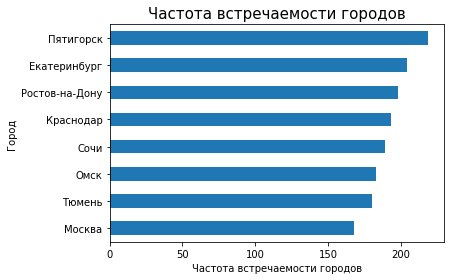

In [14]:
# Построим столбчатую диаграмму по таблице с частотой встречаемости городов.
data.plot(kind='barh')
plt.title('Частота встречаемости городов', fontsize=15)
plt.ylabel('Город')
plt.xlabel('Частота встречаемости городов')

Таким образом, в исследовании задействованы пользователи из Пятигорска, Екатеринбурга, Ростова-на-Дону, Краснодара, Сочи, Омска, Тюмени и Москвы. При этом, больше всего пользователей из Пятигорска (219 человек), а меньше всего - из Москвы (168 человек). Стоит отметить, что слишком сильного разброса по количеству пользователей из разных городов не наблюдается.

Опишем и визуализируем общую информацию о соотношении пользователей с подпиской и без подписки.

In [15]:
# Создадим таблицу, сгруппированную по типу подписки, с количеством пользователей с подпиской и без.
type_of_s = users.groupby('subscription_type')['subscription_type'].count()
type_of_s

subscription_type
free     835
ultra    699
Name: subscription_type, dtype: int64

Text(0.5, 1.0, 'Cоотношение пользователей с подпиской и без подписки')

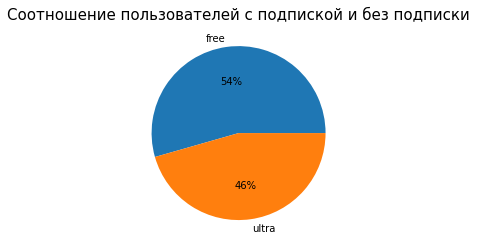

In [16]:
# Построим круговую диаграмму по таблице с количеством пользователей с подпиской и без.
type_of_s.plot(kind='pie', autopct='%1.0f%%', ylabel=' ')
plt.title('Cоотношение пользователей с подпиской и без подписки', fontsize=15)

Таким образом, пользователей без подписки немного больше, чем пользователей с подпиской на 8 процентов. 

Опишем и визуализируем общую информацию о возрасте пользователей.

In [17]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Возрастной диапазон пользователей')

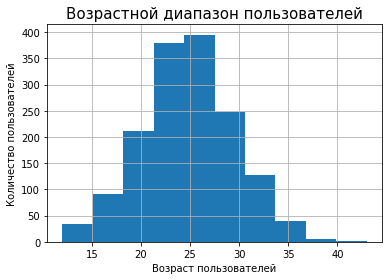

In [18]:
# Построим гистограмму по столбцу с возрастом пользователей.
ax = users['age'].hist()
ax.set_xlabel('Возраст пользователей')
ax.set_ylabel('Количество пользователей')
ax.set_title('Возрастной диапазон пользователей', fontsize=15)

Таким образом, возраст пользователей находится в диапазоне от 12 до 43 лет. При этом, основная масса пользователей самокатами - это пользователи от 21 до 27 лет. Меньше всего пользователей находятся в возрасте от 12 до 18 лет и от 34 до 43 лет.

Опишем и визуализируем общую информацию о расстоянии, которое пользователь преодолел за одну поездку.

In [19]:
# Посмотрим на минимальное и максимальное расстояния, которое пользователи преодолевают за одну поездку.
print(rides['distance'].min())
rides['distance'].max()

0.855682925681208


7211.007744598519

Text(0.5, 1.0, 'Расстояние, которое пользователь преодолел за одну поездку')

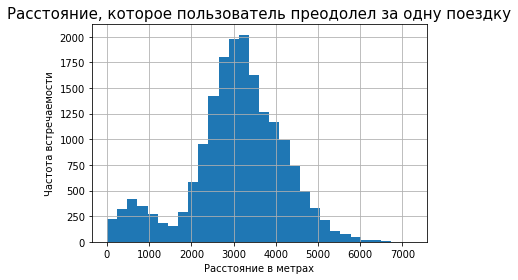

In [20]:
# Построим гистограмму по столбцу с расстоянием, которое пользователи преодолевают за одну поездку.
at = rides['distance'].hist(bins=30)
at.set_xlabel('Расстояние в метрах')
at.set_ylabel('Частота встречаемости')
at.set_title('Расстояние, которое пользователь преодолел за одну поездку', fontsize=15)

Таким образом, расстояние, которое пользователи преодолевают за одну поездку, находится в диапазоне приблизительно от 0 до 7200 метров. При этом, наибольшее число пользователей преодолевают расстояние примерно от 2600 до 3600 метров.

Опишем и визуализируем общую информацию о продолжительности одной поездки.

In [21]:
# Посмотрим, в каких границах находится продолжительность одной поездки.
print(rides['duration'].min())
rides['duration'].max()

0.5


40.82396261922424

Text(0.5, 1.0, 'Продолжительность поездок')

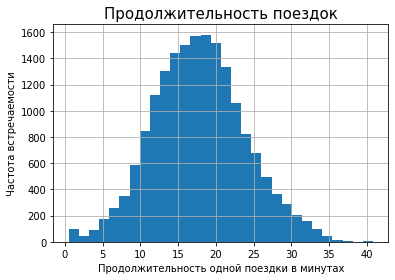

In [22]:
# Построим гистограмму по столбцу с продолжительностью одной поездки.
an = rides['duration'].hist(bins=30)
an.set_xlabel('Продолжительность одной поездки в минутах')
an.set_ylabel('Частота встречаемости')
an.set_title('Продолжительность поездок', fontsize=15)

Таким образом, продолжительность одной поездки варьируется в диапазоне приблизительно от 1 до 41 минуты. При этом большинство поездок продолжаются примерно от 14 до 21 минуты.

#### Шаг 4. Объединение данных

In [23]:
# Объединим данные о пользователях, поездках и подписках в один датафрейм.
df = rides.merge(right=users, on='user_id', how='left')
dt = df.merge(right=subscriptions, on='subscription_type', how='left')
dt.head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


In [24]:
dt.shape

(18068, 12)

In [25]:
dt.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Количество строк и столбцов верное. Пропусков не обнаружено.

In [26]:
# Создадим датафрейм о пользователях без подписки.
without_s = dt.query('subscription_type == "free"')
without_s

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [27]:
# Создадим датафрейм о пользователях с подпиской.
with_s = dt.query('subscription_type == "ultra"')
with_s

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,3973.046497,24.671163,2021-08-29,8,Оксана,22,Москва,ultra,6,0,199
6496,699,3288.702563,15.892886,2021-09-12,9,Оксана,22,Москва,ultra,6,0,199
6497,699,3076.159348,14.389525,2021-09-26,9,Оксана,22,Москва,ultra,6,0,199
6498,699,4707.845501,15.839579,2021-10-17,10,Оксана,22,Москва,ultra,6,0,199


Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

Text(0.5, 1.0, 'Расстояние поездок пользователей без подписки')

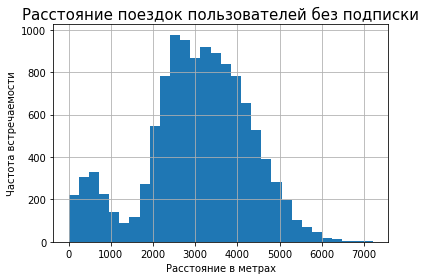

In [28]:
# Построим гистограмму по столбцу с расстоянием для пользователей без подписки.
at = without_s['distance'].hist(bins=30)
at.set_xlabel('Расстояние в метрах')
at.set_ylabel('Частота встречаемости')
at.set_title('Расстояние поездок пользователей без подписки', fontsize=15)

Большинство пользователей без подписки преодолевают расстояние от 2400 до 3800 метров. Меньше всего - от 5200 до 7200.

Text(0.5, 1.0, 'Время поездок пользователей без подписки')

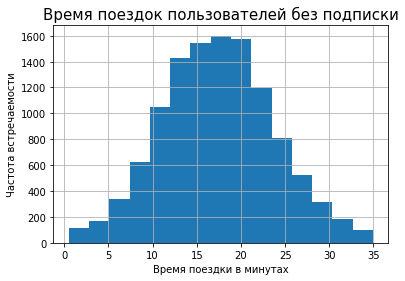

In [29]:
# Построим гистограмму по столбцу со временем поездок для пользователей без подписки.
at = without_s['duration'].hist(bins=15)
at.set_xlabel('Время поездки в минутах')
at.set_ylabel('Частота встречаемости')
at.set_title('Время поездок пользователей без подписки', fontsize=15)

Большинство пользователей без подписки тратят на поездку примерно 17-19 минут. Меньше всего тратят от 1 до 6 минут и от 27 до 35 минут.

Text(0.5, 1.0, 'Расстояние поездок пользователей с подпиской')

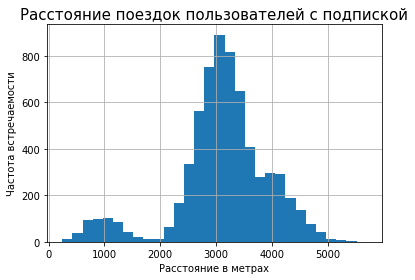

In [30]:
# Построим гистограмму по столбцу с расстоянием для пользователей с подпиской.
at = with_s['distance'].hist(bins=30)
at.set_xlabel('Расстояние в метрах')
at.set_ylabel('Частота встречаемости')
at.set_title('Расстояние поездок пользователей с подпиской', fontsize=15)

Большинство пользователей с подпиской преодолевают расстояние от 2800 до 3400 метров.

Text(0.5, 1.0, 'Время поездок пользователей с подпиской')

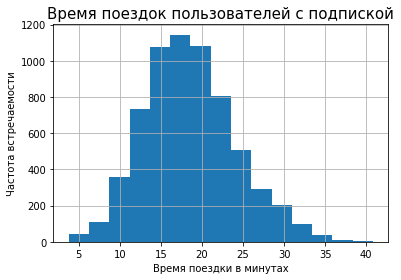

In [31]:
# Построим гистограмму по столбцу со временем поездок для пользователей с подпиской.
at = with_s['duration'].hist(bins=15)
at.set_xlabel('Время поездки в минутах')
at.set_ylabel('Частота встречаемости')
at.set_title('Время поездок пользователей с подпиской', fontsize=15)

Большинство пользователей с подпиской тратят на поездку от 14-16 и 18-21 минут. Меньше всего тратят от 3 до 8 минут и от 31 до 42 минут.

Таким образом, расстояния, которые преодолевают пользователи с подпиской и без, не сильно отличаются друг от друга.

Среднее время поездки у разных групп пользователей примерно одинаковое, но у пользователей с подпиской больше временной диапазон.

#### Шаг 5. Подсчёт выручки

Создадим датафрейм с суммарным расстоянием, количеством поездок, суммарным временем и выручкой для каждого пользователя за каждый месяц.

In [32]:
# Округлим до целого числа продолжительность поездки в таблицах по группам.
print('Пользователи с подпиской')
with_s['duration'] = np.ceil(with_s['duration']) 
display(with_s.head(10))
print('Пользователи без подписки')
without_s['duration'] = np.ceil(without_s['duration']) 
without_s.head(10)

Пользователи с подпиской


/tmp/ipykernel_203/2129223830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_s['duration'] = np.ceil(with_s['duration'])


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,19.0,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,27.0,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,17.0,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,15.0,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,24.0,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,16.0,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,16.0,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


Пользователи без подписки


/tmp/ipykernel_203/2129223830.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_s['duration'] = np.ceil(without_s['duration'])


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,15.0,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,17.0,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,21.0,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,10.0,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,18.0,2021-02-14,2,Айдар,22,Омск,free,8,50,0
6505,700,4342.002254,23.0,2021-02-23,2,Айдар,22,Омск,free,8,50,0
6506,700,3798.334905,19.0,2021-03-03,3,Айдар,22,Омск,free,8,50,0
6507,700,2984.551206,16.0,2021-04-09,4,Айдар,22,Омск,free,8,50,0
6508,700,3360.107141,17.0,2021-06-12,6,Айдар,22,Омск,free,8,50,0
6509,700,2567.543847,12.0,2021-06-23,6,Айдар,22,Омск,free,8,50,0


Создадим для удобства два датафрейма (для пользователей с подпиской и без подписки) с суммарным расстоянием, количеством поездок, суммарным временем и выручкой для каждого пользователя за каждый месяц.

In [33]:
# Создадим датафрейм с суммарным расстоянием, количеством поездок, суммарным временем и выручкой для каждого пользователя с подпиской за каждый месяц.
with_s_gr = with_s.groupby(['user_id', 'month']).agg({'distance':'sum','duration':['sum', 'count'], \
                                           'start_ride_price':'mean', 'minute_price':'mean', 'subscription_fee':'mean' })
with_s_gr.columns = ['distance', 'duration', 'count', 'start_ride_price','minute_price', 'subscription_fee']
with_s_gr['income'] = with_s_gr['minute_price']*with_s_gr['duration'] + with_s_gr['subscription_fee']
with_s_gr.head(10)

distance  duration  count  start_ride_price  minute_price  \
user_id month                                                                  
1       1       7027.511294      42.0      2                 0             6   
        4        754.159807       7.0      1                 0             6   
        8       6723.470560      46.0      2                 0             6   
        10      5809.911100      32.0      2                 0             6   
        11      7003.499363      56.0      3                 0             6   
        12      6751.629942      28.0      2                 0             6   
2       3      10187.723006      63.0      3                 0             6   
        4       6164.381824      40.0      2                 0             6   
        6       3255.338202      14.0      1                 0             6   
        7       6780.722964      48.0      2                 0             6   

               subscription_fee  income  
user_id month                            
1       1                   199   451.0  
        4                   199   241.0  
        8                   199   475.0  
        10                  199   391.0  
        11                  199   535.0  
        12                  199   367.0  
2       3                   199   577.0  
        4                   199   439.0  
        6                   199   283.0  
        7                   199   487.0

In [34]:
# Создадим датафрейм с суммарным расстоянием, количеством поездок, суммарным временем и выручкой для каждого пользователя без подписки за каждый месяц.
without_s_gr = without_s.groupby(['user_id', 'month']).agg({'distance':'sum','duration':['sum', 'count'], \
                                           'start_ride_price':'mean', 'minute_price':'mean', 'subscription_fee':'mean' })
without_s_gr.columns = ['distance', 'duration', 'count', 'start_ride_price','minute_price', 'subscription_fee']
without_s_gr['income'] = without_s_gr['start_ride_price']*without_s_gr['count'] + without_s_gr['minute_price']*without_s_gr['duration']
without_s_gr.head(10)

distance  duration  count  start_ride_price  minute_price  \
user_id month                                                                  
700     1       2515.690719      15.0      1                50             8   
        2      13446.659764      89.0      5                50             8   
        3       3798.334905      19.0      1                50             8   
        4       2984.551206      16.0      1                50             8   
        6       5927.650988      29.0      2                50             8   
        7       4399.206279      21.0      2                50             8   
        8       4071.654669      17.0      1                50             8   
        10      6322.578618      44.0      2                50             8   
        11      8735.782625      32.0      3                50             8   
701     1       2676.472894      18.0      1                50             8   

               subscription_fee  income  
user_id month                            
700     1                     0   170.0  
        2                     0   962.0  
        3                     0   202.0  
        4                     0   178.0  
        6                     0   332.0  
        7                     0   268.0  
        8                     0   186.0  
        10                    0   452.0  
        11                    0   406.0  
701     1                     0   194.0

#### Шаг 6. Проверка гипотез

1. Проверим гипотезу о том, тратят ли пользователи с подпиской больше времени на поездки.

**Нулевая гипотеза**: пользователи с подпиской тратят на поездки столько же времени, сколько пользователи без подписки.

**Альтернативная гипотеза**: пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки.

In [35]:
results = st.ttest_ind(with_s['duration'], without_s['duration'], alternative='greater')
results

Ttest_indResult(statistic=12.186464491247767, pvalue=2.4959453720736625e-34)

In [36]:
print(with_s['duration'].mean())
without_s['duration'].mean()

19.037692307692307


17.890992392807746

Уровень статистической значимости (альфа) зададим 0,5. Следовательно, так как pvalue меньше альфа, отвергаем нулевую гипотезу. Таким образом, пользователи с подпиской тратят больше времени на поездки.

2. Проверим гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

**Нулевая гипотеза**: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.

**Альтернативная гипотеза**: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку,  больше 3130 метров.

In [37]:
value=3130
results = st.ttest_1samp(with_s['distance'], value, alternative='greater')
results

Ttest_1sampResult(statistic=-1.402123166869486, pvalue=0.9195368847849785)

Уровень статистической значимости (альфа) зададим 0,5. Следовательно, так как pvalue больше альфа, принимаем нулевую гипотезу. Таким образом, среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

**Нулевая гипотеза**: помесячная выручка от пользователей с подпиской равна помесячной выручке пользователей без подписки.

**Альтернативная гипотеза**: помесячная выручка от пользователей с подпиской выше, чем помесячная выручка пользователей без подписки.

In [38]:
# Используем созданные нами ранее датафреймы.
results = st.ttest_ind(with_s_gr['income'], without_s_gr['income'], alternative='greater')
results

Ttest_indResult(statistic=11.64246602360774, pvalue=1.8850394384715216e-31)

Уровень статистической значимости (альфа) зададим 0,5. Следовательно, так как pvalue меньше альфа, отвергаем нулевую гипотезу. Таким образом, помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

4. *Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?*

Для проверки данной гипотезы понадобился бы тест для проверки гипотез о равенстве средних для парных (зависимых) выборок (ttest_rel).

**Вывод**:

таким образом, в процессе исследования мы изучили необходимые датафреймы, проверили их на наличие пропущенных значений и дубликатов, визуализировали и описали необходимую информацию о пользователях и поездах, в результате чего сделали следующие выводы:

- в исследовании задействованы пользователи из Пятигорска, Екатеринбурга, Ростова-на-Дону, Краснодара, Сочи, Омска, Тюмени и Москвы. При этом, больше всего пользователей из Пятигорска (219 человек), а меньше всего - из Москвы (168 человек);

- пользователей без подписки (835 человек) больше, чем пользователей с подпиской (699 человек) на 136 человек;

- возраст пользователей находится в диапазоне от 12 до 43 лет. При этом, основная масса пользователей самокатами - это пользователи от 21 до 27 лет. Меньше всего пользователей находятся в возрасте от 12 до 18 лет и от 34 до 43 лет;

- расстояние, которое пользователи преодолевают за одну поездку, находится в диапазоне приблизительно от 0 до 7200 метров. При этом, наибольшее число пользователей преодолевают расстояние примерно от 2600 до 3600 метров;

- продолжительность одной поездки варьируется в диапазоне приблизительно от 1 до 41 минуты. При этом большинство поездок продолжаются примерно от 14 до 21 минут.

Также мы объединили данные в один датафрейм и создали на его основе еще два датафрейма: о пользователях без подписки и о пользователях с подпиской. По ним визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий. Так, большинство пользователей без подписки преодолевают расстояние от 2400 до 3800 метров. Меньше всего - от 5200 до 7200. А Большинство пользователей с подпиской преодолевают расстояние от 2800 до 3400 метров. Меньше всего - от 200 до 2500 метров. Также большинство пользователей без подписки тратят на поездку примерно от 17-19 минут. Меньше всего тратят от 1 до 6 минут и от 25 до 35 минут. Большинство пользователей с подпиской тратят на поездку от 14 до 21 минуты. Меньше всего тратят от 3 до 8 минут и от 31 до 42 минут.

Мы создали датафреймы по двум группа пользователей с агрегированными данными о поездках: с суммарным расстоянием, количеством поездок и суммарным временем для каждого пользователя за каждый месяц. А также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

Также мы проверили несколько гипотез и сделали следующие выводы:

- пользователи с подпиской тратят больше времени на поездки;
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров;
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.